First aspect of this is to collect data and import the necessary files:

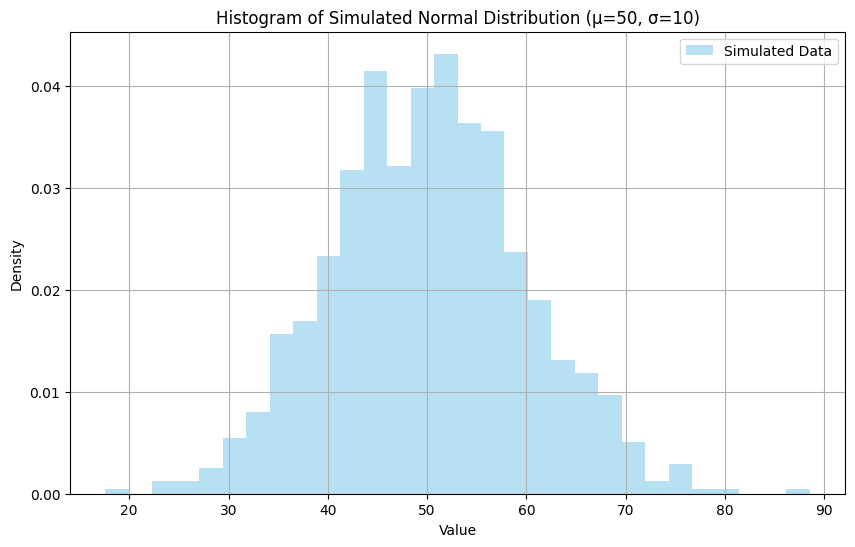

In [8]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  # For reproducibility
n_samples = 1000
mu = 50  # Mean
sigma = 10  # Standard deviation
data = np.random.normal(mu, sigma, n_samples)


plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Simulated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Simulated Normal Distribution (μ=50, σ=10)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print(f"Simulated data shape: {data.shape}")
print(f"True mean: {mu}, True standard deviation: {sigma}")

Simulated data shape: (1000,)
True mean: 50, True standard deviation: 10


Now we need to fit the normal distribution using MLE

In [10]:
def mle_normal_parameters(data):
    """Estimate mean and standard deviation using Maximum Likelihood Estimation."""
    n = len(data)
    mu_hat = np.mean(data)  # MLE for mean is the sample mean
    sigma_hat = np.sqrt(np.sum((data - mu_hat) ** 2) / n)  # MLE for std dev (unbiased)
    return mu_hat, sigma_hat

# Fit the model
mu_hat, sigma_hat = mle_normal_parameters(data)

# Define PDF of normal distribution
def normal_pdf(x, mu, sigma):
    """Calculate the probability density function of a normal distribution."""
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coefficient * np.exp(exponent)

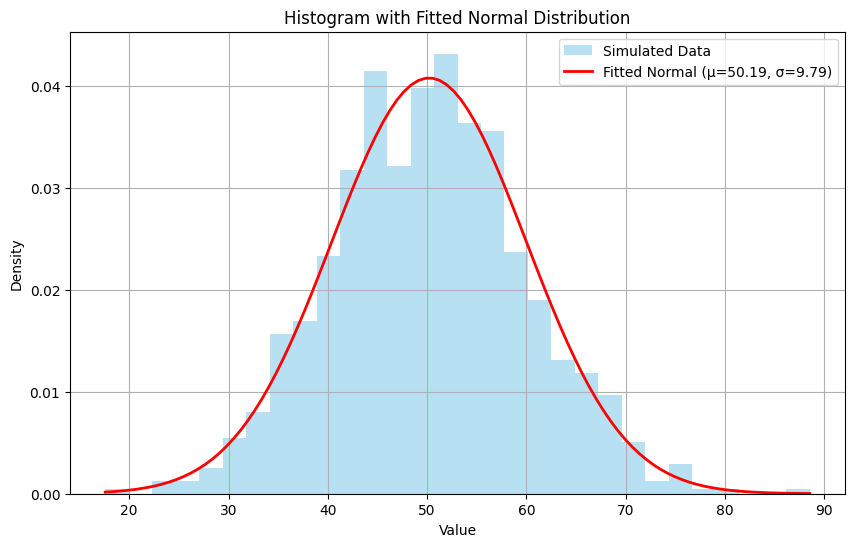

Estimated mean (MLE): 50.1933
Estimated standard deviation (MLE): 9.7873


In [11]:
# Overlay PDF on histogram
x_range = np.linspace(min(data), max(data), 100)
pdf_values = normal_pdf(x_range, mu_hat, sigma_hat)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Simulated Data')
plt.plot(x_range, pdf_values, 'r-', lw=2, label=f'Fitted Normal (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Fitted Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated mean (MLE): {mu_hat:.4f}")
print(f"Estimated standard deviation (MLE): {sigma_hat:.4f}")

Now we have to identify the outliers and refit. First sample 50 samples from a uniform distribution.

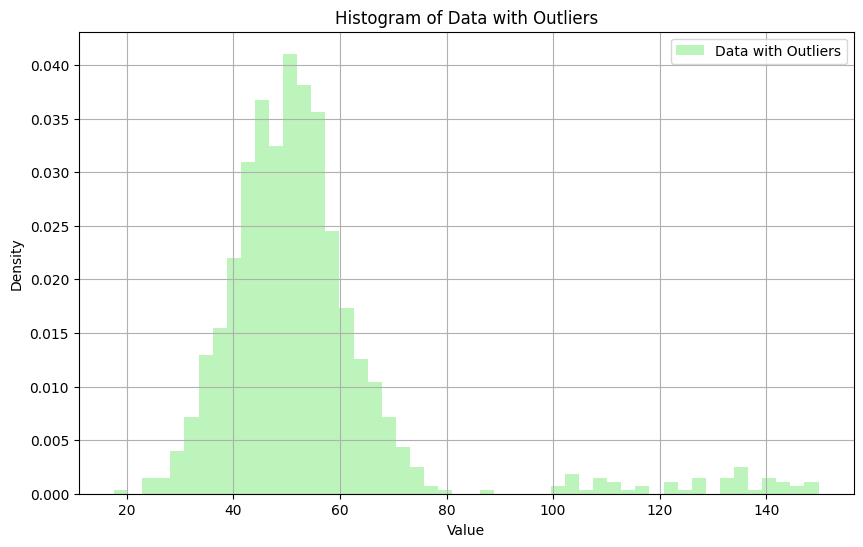

In [12]:
n_outliers = 50
outliers = np.random.uniform(100, 150, n_outliers)
data_with_outliers = np.concatenate([data, outliers])

# Plot histogram with outliers
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=50, density=True, alpha=0.6, color='lightgreen', label='Data with Outliers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Data with Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Fit normal distribution to data with outliers
mu_hat_outliers, sigma_hat_outliers = mle_normal_parameters(data_with_outliers)

# Overlay PDF on histogram with outliers
x_range_outliers = np.linspace(min(data_with_outliers), max(data_with_outliers), 200)
pdf_values_outliers = normal_pdf(x_range_outliers, mu_hat_outliers, sigma_hat_outliers)

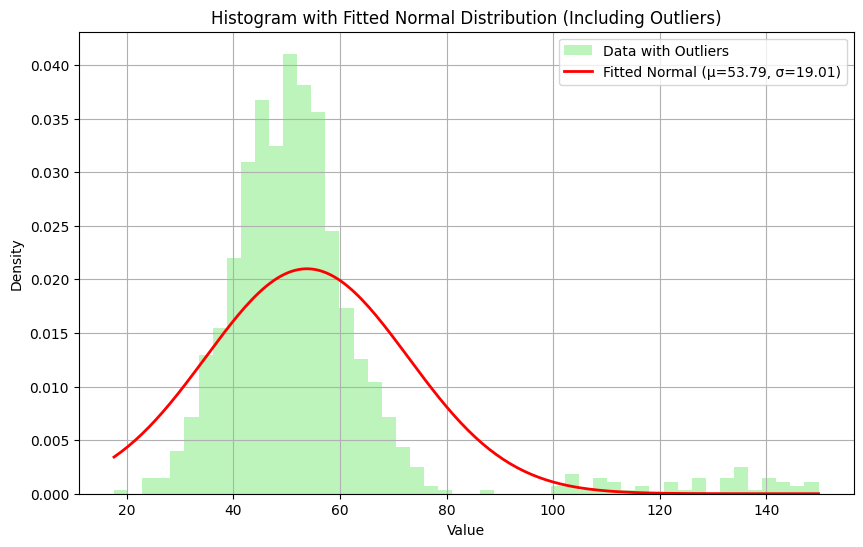

Estimated mean with outliers (MLE): 53.7933
Estimated standard deviation with outliers (MLE): 19.0078

Comparison of Parameters:
Original data - Mean: 50.1933, Std Dev: 9.7873
Data with outliers - Mean: 53.7933, Std Dev: 19.0078


In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=50, density=True, alpha=0.6, color='lightgreen', label='Data with Outliers')
plt.plot(x_range_outliers, pdf_values_outliers, 'r-', lw=2, label=f'Fitted Normal (μ={mu_hat_outliers:.2f}, σ={sigma_hat_outliers:.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Fitted Normal Distribution (Including Outliers)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated mean with outliers (MLE): {mu_hat_outliers:.4f}")
print(f"Estimated standard deviation with outliers (MLE): {sigma_hat_outliers:.4f}")

# Compare parameters
print("\nComparison of Parameters:")
print(f"Original data - Mean: {mu_hat:.4f}, Std Dev: {sigma_hat:.4f}")
print(f"Data with outliers - Mean: {mu_hat_outliers:.4f}, Std Dev: {sigma_hat_outliers:.4f}")

# Impact of outliers:

Outliers significantly affect the estimated parameters:
- The mean shifts from 50.1933 to 53.7933 due to the addition of high values (100-150).
- The standard deviation increases from 9.7873 to 19.0078, reflecting the increased spread caused by outliers.

This indicates that MLE is sensitive to outliers, as it treats all data points equally, pulling the mean and inflating the variance.

# Approach to detect outliers:

One effective approach to detect outliers is the Interquartile Range (IQR) method:
1. Calculate the first quartile (Q1) and third quartile (Q3) of the data.
2. Compute the IQR = Q3 - Q1.
3. Define outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
This method can be implemented to identify and potentially remove or adjust the impact of outliers before fitting the model.

In [14]:
# Implement IQR method to detect outliers
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_detected = data_with_outliers[(data_with_outliers < lower_bound) | (data_with_outliers > upper_bound)]
print(f"\nDetected outliers using IQR method: {len(outliers_detected)} values")
print(f"Outlier values: {outliers_detected}")


Detected outliers using IQR method: 55 values
Outlier values: [ 88.52731491  17.5873266   80.78880808  23.03113357  23.49030192
 108.37412911 105.22839202 131.82151248 135.32378632 101.57930724
 146.81061231 102.59856418 127.06481677 135.45302597 143.54845619
 135.70434661 140.08640415 116.97250963 140.74125569 104.00574232
 144.7408328  127.37961881 140.8648885  122.61591423 132.17888476
 126.32013305 136.57947609 104.0814991  103.0176042  112.3551617
 107.97723401 143.58917833 110.96069937 148.79326279 116.84478959
 109.10589578 139.48492536 132.93538878 124.90978582 127.76817755
 135.96008891 111.42273707 149.8166958  148.73965811 132.51628432
 109.97712255 134.01141212 103.60992045 101.53262511 112.88414443
 123.13114784 143.41362527 136.35845349 137.13532606 121.27466672]
